# Students Result Prediction Model 
The model is trained in such a way that student obtained percentage will be predicted by giving corresponding students studying hours as input.

-Built by Hiranmayee & Ksheeraj

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('data.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Analysis

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [6]:
data.shape

(25, 2)

# Data Visualization

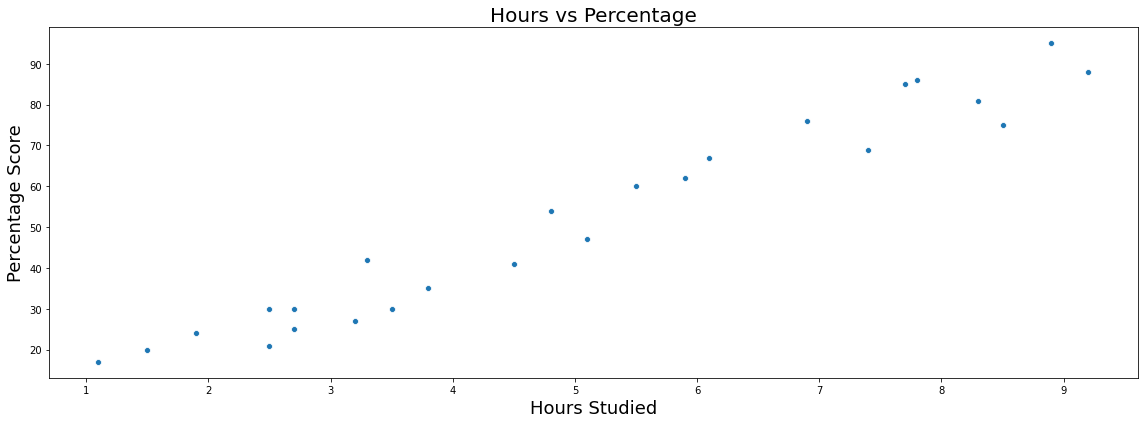

In [8]:
plt.figure(figsize=(16,6))

sb.scatterplot(x='Hours', y='Scores', data=data)

plt.title('Hours vs Percentage', fontsize=20) 
plt.xlabel('Hours Studied', fontsize=18)  
plt.ylabel('Percentage Score', fontsize=18)  
plt.tight_layout()

Text(0, 0.5, 'scores')

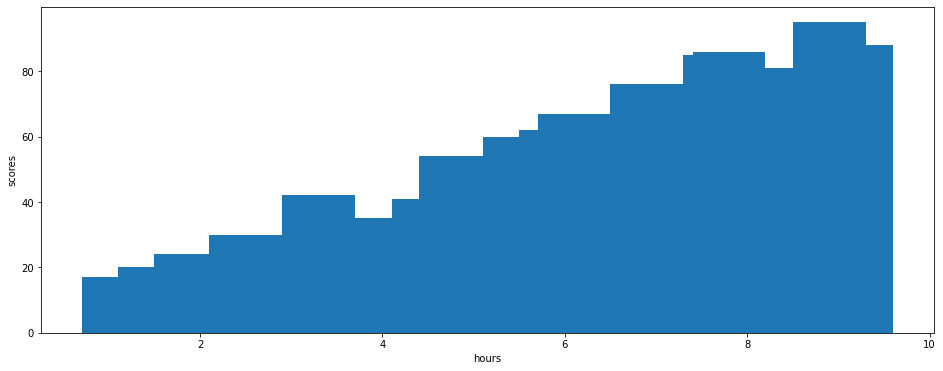

In [9]:
plt.figure(figsize=(16,6))

plt.bar(data['Hours'],data['Scores'])
plt.xlabel('hours')
plt.ylabel('scores')

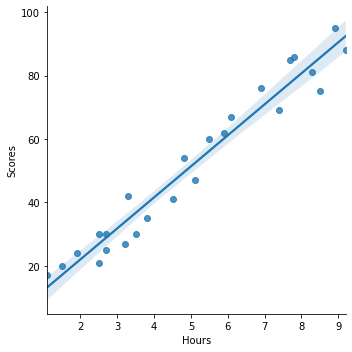

In [10]:
sb.lmplot(x='Hours', y='Scores', data=data)

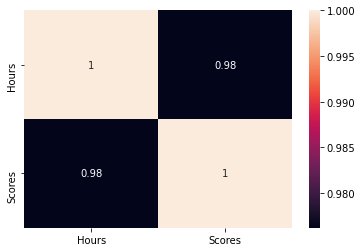

In [11]:
sb.heatmap(data.corr(), annot=True)

# Splitting the dataset

In [13]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Model training

In [17]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred=regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[75.   85.14]
 [54.   49.28]
 [35.   39.59]
 [95.   89.02]
 [85.   77.39]]


In [21]:
slope=regressor.coef_
y_intercept=regressor.intercept_
line=(slope*x)+y_intercept

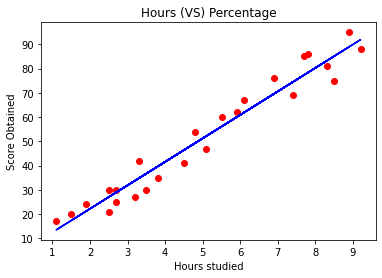

In [22]:
plt.scatter(x,y,c='r')
plt.plot(x,line,c='b')
plt.title("Hours (VS) Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Score Obtained")
plt.show()

# Testing with an input

In [23]:
hour=9.25
percentage=regressor.predict([[hour]])
print("the student obtained {} percentage by studying {} hours".format(percentage[0],hour))

the student obtained 92.40866233491064 percentage by studying 9.25 hours


In [26]:
r_score=r2_score(y_test,y_pred)
r_score

0.8978572236829756